In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import os
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import re
import string
import warnings
warnings.filterwarnings("ignore")

In [2]:
data_frame_fake = pd.read_csv("Fake.csv")
data_frame_true = pd.read_csv("True.csv")

In [3]:
data_frame_fake.head(5)

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [4]:
data_frame_true.head(5)

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [5]:
data_frame_fake["catagory"] = 0
data_frame_true["catagory"] = 1

In [6]:
data_frame_fake.shape, data_frame_true.shape

((23481, 5), (21417, 5))

In [7]:
data_frame_marge = pd.concat([data_frame_fake, data_frame_true], axis =0 )
data_frame_marge.sample(5)

,title,text,subject,date,catagory
20817,MOOCH CRIES VICTIM (Again) In Speech To Argent...,Ahhh Mooch The perpetual victim. Never mind th...,left-news,"Mar 24, 2016",0
14907,Google broadens takedown of extremist YouTube ...,SAN FRANCISCO (Reuters) - Alphabet Inc s Googl...,worldnews,"November 14, 2017",1
18449,Iraq parliament votes to halt transactions wit...,BAGHDAD (Reuters) - Iraq s parliament voted on...,worldnews,"October 3, 2017",1
1931,Labor activists target Midwest politicians opp...,CHICAGO (Reuters) - U.S. activists plan protes...,politicsNews,"September 2, 2017",1
672,"Vietnam, China avoid quarrel over South China ...",(Reuters) - China and Vietnam avoided conflict...,politicsNews,"November 12, 2017",1


<AxesSubplot:xlabel='catagory', ylabel='count'>

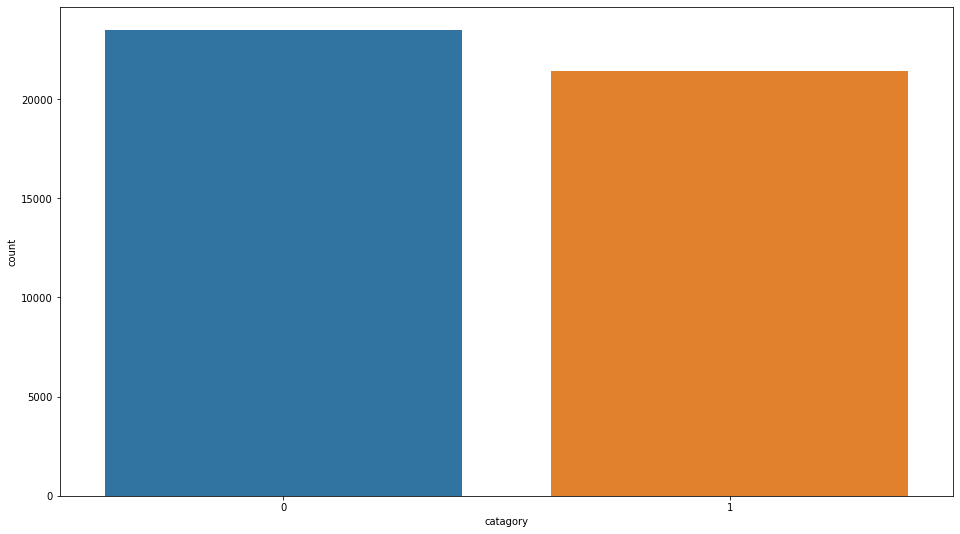

In [8]:
plt.figure(figsize = (16,9))
sns.countplot(data_frame_marge.catagory)

In [9]:
data_frame_marge.columns

Index(['title', 'text', 'subject', 'date', 'catagory'], dtype='object')

In [10]:
data_frame = data_frame_marge.drop(["title", "subject","date"], axis = 1)

In [11]:
data_frame.isnull().sum()

text        0
catagory    0
dtype: int64

In [12]:
data_frame = data_frame.sample(frac = 1)

In [13]:
data_frame.reset_index(inplace = True)
data_frame.drop(["index"], axis = 1, inplace = True)

In [14]:
data_frame.head(15)

,text,catagory
0,"AMES, Iowa (Reuters) - Sarah Palin, the politi...",1
1,The narrative regarding the Trump-Russia conne...,0
2,WASHINGTON (Reuters) - President-elect Donald ...,1
3,"WASHINGTON (Reuters) - Monica Crowley, the for...",1
4,GENEVA (Reuters) - The U.N refugee agency on F...,1
5,Donald Trump is pretty terrible. He s exactly ...,0
6,,0
7,Despite the fact that Donald Trump has admitte...,0
8,CAIRO (Reuters) - Russia is ready in principle...,1
9,"A little over one year ago, radical activist, ...",0


In [15]:
def word_drop(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text) 
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)    
    return text

In [16]:
data_frame["text"] = data_frame["text"].apply(word_drop)

In [46]:
data_frame.head(5)

,text,catagory
0,ames iowa reuters sarah palin the politi...,1
1,the narrative regarding the trump russia conne...,0
2,washington reuters president elect donald ...,1
3,washington reuters monica crowley the for...,1
4,geneva reuters the u n refugee agency on f...,1


In [18]:
data_frame.isnull().sum()

text        0
catagory    0
dtype: int64

In [19]:
x = data_frame["text"]
y = data_frame["catagory"]

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [22]:
vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)

In [23]:
from sklearn.linear_model import LogisticRegression

In [24]:
LR = LogisticRegression()
LR.fit(xv_train,y_train)

LogisticRegression()

In [25]:
pred_lr=LR.predict(xv_test)

In [26]:
LR.score(xv_test, y_test)

0.9865478841870824

In [27]:
print(classification_report(y_test, pred_lr))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5906
           1       0.98      0.99      0.99      5319

    accuracy                           0.99     11225
   macro avg       0.99      0.99      0.99     11225
weighted avg       0.99      0.99      0.99     11225



In [28]:
from sklearn.ensemble import GradientBoostingClassifier

In [29]:
GBC = GradientBoostingClassifier(random_state = 0)
GBC.fit(xv_train, y_train)

GradientBoostingClassifier(random_state=0)

In [30]:
pred_gbc = GBC.predict(xv_test)

In [31]:
LR.score(xv_test, y_test)

0.9865478841870824

In [32]:
print(classification_report(y_test, pred_gbc))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      5906
           1       0.99      1.00      0.99      5319

    accuracy                           1.00     11225
   macro avg       0.99      1.00      1.00     11225
weighted avg       1.00      1.00      1.00     11225



In [33]:
from sklearn.tree import DecisionTreeClassifier

In [34]:
DTC = DecisionTreeClassifier(random_state = 0)

In [35]:
DTC.fit(xv_test, y_test)

DecisionTreeClassifier(random_state=0)

In [36]:
pred_dtc = DTC.predict(xv_test)

In [37]:
DTC.score(xv_test, y_test)

0.9999109131403118

In [38]:
print(classification_report(y_test, pred_dtc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5906
           1       1.00      1.00      1.00      5319

    accuracy                           1.00     11225
   macro avg       1.00      1.00      1.00     11225
weighted avg       1.00      1.00      1.00     11225



In [39]:
from sklearn.ensemble import RandomForestClassifier

In [40]:
RFC = RandomForestClassifier()

In [41]:
RFC.fit(xv_test, y_test)

RandomForestClassifier()

In [42]:
pred_rfc = RFC.predict(xv_test)

In [43]:
RFC.score(xv_test, y_test)

0.9999109131403118

In [44]:
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5906
           1       1.00      1.00      1.00      5319

    accuracy                           1.00     11225
   macro avg       1.00      1.00      1.00     11225
weighted avg       1.00      1.00      1.00     11225

